## Assignment for EE5731 AY2023/2024 Semester 2
### Exploring Edge and Corner Detection from Ultra-dark Images and Finding Epipolar Lines from Stereo Image Pairs (100)

#### Background
While understanding of vision information through computer vision techniques have been developed (and still developing) over the past decades, current techniques may not be applied directly to real-world applications due to various constraints. One of the concerns is that current techniques are mainly developed assuming the input data are shot under a non-challenging environment, with adequate illumination and contrast. This leads to the observable fragility of current techniques, which may not be capable to generalize well to adverse environments, including dark environments with low illumination. Take security surveillance as an example: obtaining crucial visual information such as edges and corners could play a vital role in detecting objects for anomaly detection. However, anomalies are more common at nighttime and in dark environments, yet current computer vision approaches are largely obscured by darkness, and are unable to extract key visual information effectively. It is therefore highly desirable to explore how we could obtain visual information given the current computer vision approaches in ultra-dark images.

#### Requirements
In this assignment, you are to complete several tasks that explores ways to obtain edges and corners from ultra-dark images, and to find epipolar lines from stereo dark image pairs.

Before doing the project, please read the instructions carefully (failure to follow them may result in unnecessary penalty):

1. Implement your codes with the code block in jupyter notebook, you may add in however much code blocks you require. TODO code blocks are added as placeholders. **DO NOT** modify the instructional markdown blocks;
2. Make sure your codes **clean**, **easily readable** (add meaningful comments if needed, comments are **markable**);
3. Make sure that the **submitted notebooks have been run** and the **cell outputs are clearly visible**.
4. Write your answers in the given markdown cells (with [**Fill in xxxx**]), keep your answers clear and concise;
5. Your submission should be the exported PDF file of your jupyter notebook. It is easier for you to **"Export to HTML"** first, then **Print to PDF**. Please print your PDF strictly in **Portrait** mode. Name your PDF file strictly to **"MATRICULATION NUMBER_YOUR NAME_CA1.pdf"**
6. Incorrect submission format will result in a **direct** 20 points (out of 100) deduction.
6. Do submit your project on [Canvas](https://canvas.nus.edu.sg/) before the deadline: **5:59 pm (SGT), 4 October, 2024**; 
7. Policy on late submission: the deadline is a strict one, so please prepare and plan early and carefully. Any late submission will be deducted 10 points (out of 100) for every 24 hours.
8. This is an individual project, do **NOT** share your solutions with others, we have zero tolerance for **plagiarism**.

#### Before Task 1
- For the following task, you are to use [Pic1](https://canvas.nus.edu.sg/files/4601735/download?download_frd=1) as the ultra-dark image (denote as Dark-1). The corresponding long-exposure normal brightness image is [GT1](https://canvas.nus.edu.sg/files/4601732/download?download_frd=1) (denote as Bright-1).
- All raw images are given in RGB format (colored images), but you may also convert to grayscale images for your convenience. Show the step and result of grayscale conversion first if you are to convert to grayscale for your tasks.
- **IMPORTANT!** You may use any function of OpenCV or its equivalence for basic operations (e.g., loading images, matrix computation, etc.), but **strictly NOT** the direct functions for each individual task/step (e.g., cv2.Canny or its equivalence for Canny edge detection, and cv2.equalizeHist for histogram equalization). Using such functions would consider the code to be erroneous.

#### Task 1: Canny edge detection and Harris corener detection in ultra-dark images (60%)
In this task, you will need to implement the Canny edge detection algorithm and try to improve its performance with image enhancement methods. You are to discuss how the characteristics of ultra-dark images affect the performance of Canny edge detection, and how different image enhancement methods would improve/affect the performance of Canny edge detection on ultra-dark images. You are to follow the following steps (requirements):

##### Detailed Steps/Requirements for Task 1:
1. Compute the image histograms of both Dark-1 and Bright-1, then discuss your observations, what is the characteristics of an ultra-dark image and how it is observed through the image histograms. (10%)
2. Perform Canny edge detection on both Dark-1 and Bright-1. For **at least one of the images**, show the output of every single key step of Canny edge detection (e.g., after image smoothing, after computing partial derivatives, after applying threshold, etc.) as well as the final output. Observe and compare the performances of Canny edge detection on Dark-1 and Bright-1 and discuss why you would observe your result. (10%)
3. Perform Harris corner detector detection on both Dark-1 and Bright-1. For **at least one of the images**, show the output of every single key step of Harris corner detector detection as well as the final output. Observe and compare the performances of Harris corner detector detection on Dark-1 and Bright-1 and discuss why you would observe your result. (10%)
4. Implement **histogram equalization (HE)** from scratch to Dark-1. Output the results of HE (denote as Dark-1-HE) and discuss your observation: how HE change/improve the sampled images. Hypothesize how will the output of Canny edge detection and Harris corner detection be like for Dark-1-HE. (10%)
5. Apply your implementation of Canny edge detection and Harris corner detection onto your HE-enhanced sampled images and demonstrate the final output. Do the final outputs fit your hypothesis? If yes, rationalize your hypothsis. If not, describe and explain the differences. Also discuss how are the results compared to that of Bright-1? (10%)
6. Lastly, choose a image enhancement method you prefer. **State** what image enhancement method has been chosen. Implement it with **appropriate comments** and output the results (denote as Dark-1-Self). Apply Canny edge detection and Harris corner detection onto Dark-1-Self and display the results. Discuss the differences between the Dark-1-Self against Dark-1-HE. Further, observe, compare, and rationalize the difference between the edges and corners detected between Dark-1, Dark-1-HE, Dark-1-Self, and Bright-1. (10%)
- *Note for Step 6: you may use open-source codes or direct functions in OpenCV or equivalent for the chosen image enhancement method.*

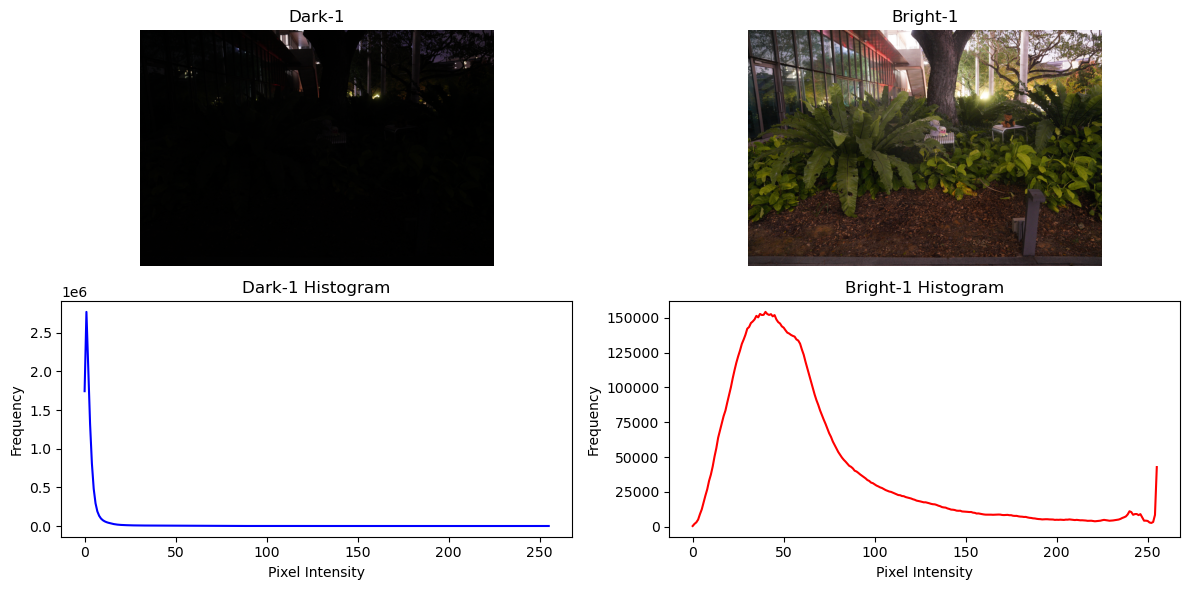

Dark-1 - Min: 0, Max: 255, Mean: 4.03
Bright-1 - Min: 0, Max: 255, Mean: 64.84


In [1]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 1 IS HERE                           ##
#############################################################################
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
dark_1 = cv2.imread('Pic1.jpg')
bright_1 = cv2.imread('GT1.jpg')

# Convert to grayscale
dark_1_gray = cv2.cvtColor(dark_1, cv2.COLOR_BGR2GRAY)
bright_1_gray = cv2.cvtColor(bright_1, cv2.COLOR_BGR2GRAY)

def compute_histogram(image):
    # Initialize an array to store the histogram
    histogram = np.zeros(256, dtype=int)
    
    # Count the occurrences of each pixel intensity
    for pixel_value in image.flatten():
        histogram[pixel_value] += 1
    
    return histogram

# Compute histograms
dark_hist = compute_histogram(dark_1_gray)
bright_hist = compute_histogram(bright_1_gray)

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(221)
plt.imshow(cv2.cvtColor(dark_1, cv2.COLOR_BGR2RGB))
plt.title('Dark-1')
plt.axis('off')

plt.subplot(222)
plt.imshow(cv2.cvtColor(bright_1, cv2.COLOR_BGR2RGB))
plt.title('Bright-1')
plt.axis('off')

plt.subplot(223)
plt.plot(dark_hist, color='b')
plt.title('Dark-1 Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(224)
plt.plot(bright_hist, color='r')
plt.title('Bright-1 Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Dark-1 - Min: {dark_1_gray.min()}, Max: {dark_1_gray.max()}, Mean: {dark_1_gray.mean():.2f}")
print(f"Bright-1 - Min: {bright_1_gray.min()}, Max: {bright_1_gray.max()}, Mean: {bright_1_gray.mean():.2f}")


[**Fill in your discussion to Step 1 here**]

The ultra-dark image has following characteristics:
1. Low brightness. The overall brightness of the image is low, most of the pixel intensity values concentrated in the lower end of the spectrum.
2. Loss of details. Due to the low brightness, the image appears washed out and details are lost, the edges and objects in the image are difficult to distinguish.
3. Limited contrast. The narrow range of pixel intensity values results in poor differentiation between features in the image.

How it is observed through the image histograms:
1. The histogram of Dark-1 has a strong skew towards the left side (lower pixel intensity values), this indicates that most of the pixel intensity values are concentrated in the lower end of the spectrum so the image has a low overall brightness compared to the bright-1 image.
2. The histogram of Dark-1 has a peak at low intensity values, indicating that there are more pixels with lower intensity values in the image comparing to the bright-1 image.
3. The histogram of Dark-1 has a narrow range of pixel intensity values compared to the bright-1 histogram, indicating that the contrast of the image is limited.
4. The histogram of Dark-1 has a rapid drop-off after the initial peak, also indicates that the image has low brightness and can loss details.

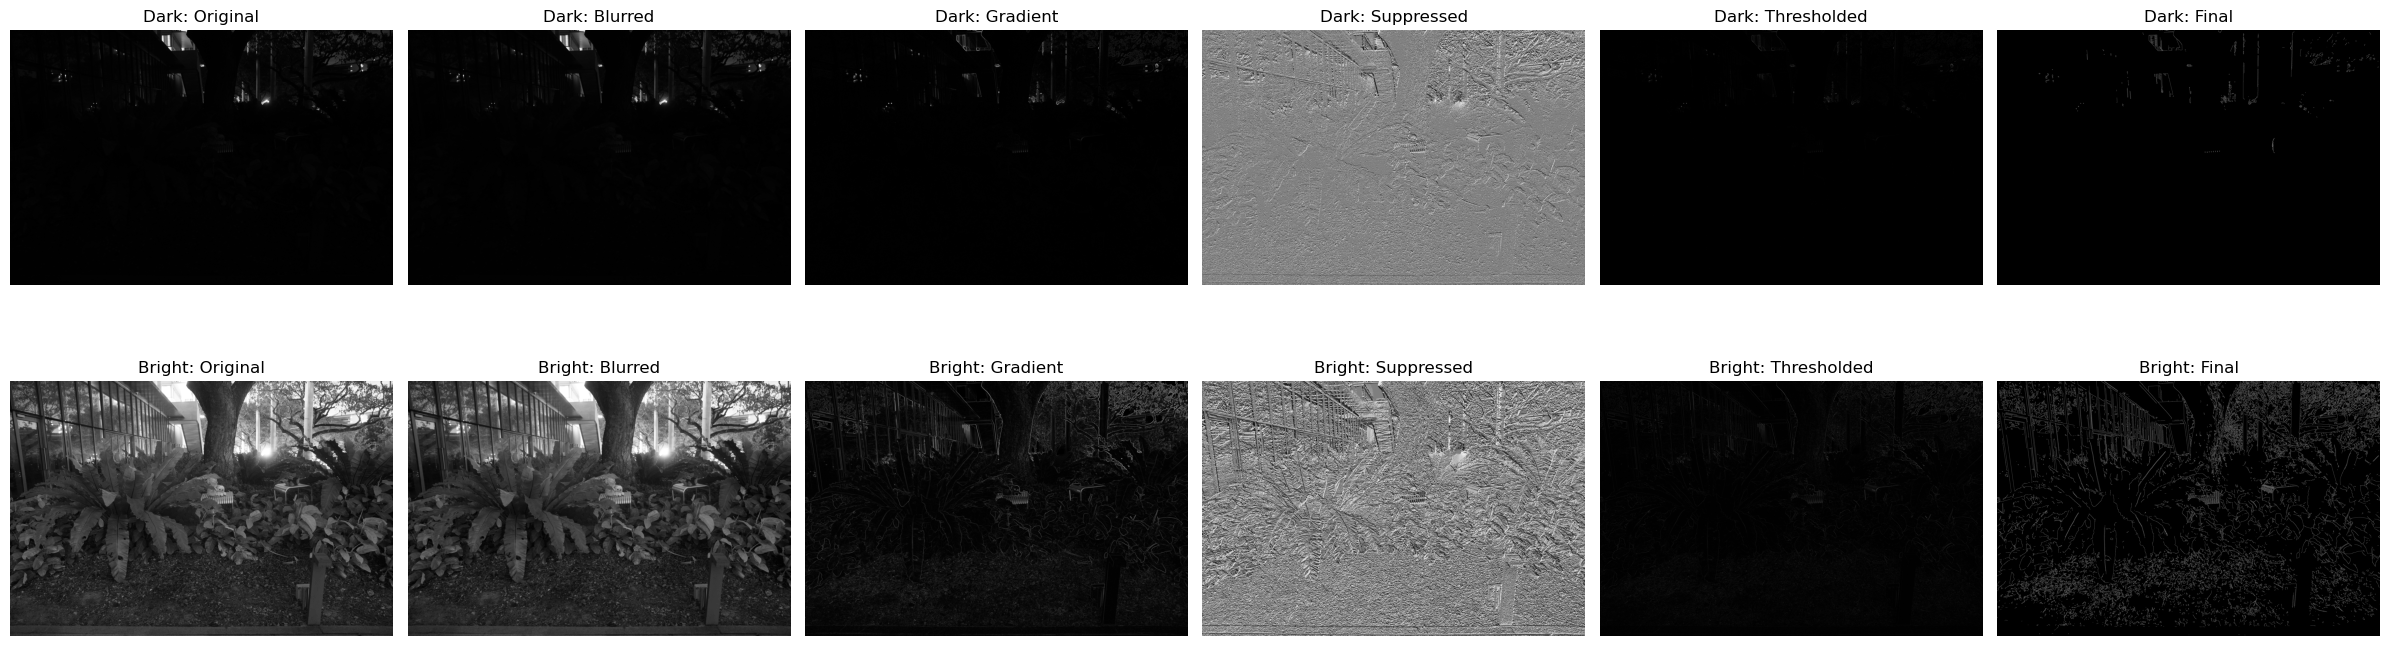

In [4]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 2 IS HERE                           ##
#############################################################################

#generate gaussian kernel
def gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

#calculate gradient and direction
def gradient_and_direction(image):
    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)
    Ky = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]], dtype=np.float32)
    Ix = cv2.filter2D(image, cv2.CV_64F, Kx)
    Iy = cv2.filter2D(image, cv2.CV_64F, Ky)
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    return (G, theta)

#non-maximum suppression
def non_max_suppression(G, theta):
    M, N = G.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = theta * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255

                # angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = G[i, j+1]
                    r = G[i, j-1]
                # angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = G[i+1, j-1]
                    r = G[i-1, j+1]
                # angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = G[i+1, j]
                    r = G[i-1, j]
                # angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = G[i-1, j-1]
                    r = G[i+1, j+1]

                if (G[i,j] >= q) and (G[i,j] >= r):
                    Z[i,j] = G[i,j]
                else:
                    Z[i,j] = 0
            except IndexError as e:
                pass
    return Z

#double threshold
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.15):
    highThreshold = img.max() * highThresholdRatio
    lowThreshold = highThreshold * lowThresholdRatio

    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)

    strong = np.int32(255)
    weak = np.int32(75)

    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)

    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return (res, weak, strong)

#hysteresis
def hysteresis(img, weak, strong=255):
    M, N = img.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if img[i,j] == weak:
                if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                    or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                    or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                    img[i,j] = strong
                else:
                    img[i,j] = 0
    return img

#canny edge detector
def canny_edge_detector(image, kernel_size=5, sigma=1.4, lowthreshold=0.05, highthreshold=0.15):
    # Step 1: Gaussian Blur
    kernel = gaussian_kernel(kernel_size, sigma)
    smoothed = cv2.filter2D(image, -1, kernel)
    # Step 2: Compute gradients
    gradient_magnitude, gradient_direction = gradient_and_direction(smoothed)
    # Step 3: Non-maximum suppression
    nonMaxImg = non_max_suppression(gradient_magnitude, gradient_direction)
    # Step 4: Double threshold
    thresholdImg, weak, strong = threshold(nonMaxImg, lowthreshold, highthreshold)
    # Step 5: Hysteresis
    final_img = hysteresis(thresholdImg, weak, strong)
    return smoothed, gradient_magnitude, gradient_direction, nonMaxImg, thresholdImg, final_img


# Apply Canny edge detection to both images
dark_steps = canny_edge_detector(dark_1_gray)
bright_steps = canny_edge_detector(bright_1_gray)

# Plot results
fig, axes = plt.subplots(2, 6, figsize=(24, 8)) 
titles = ['Original', 'Blurred', 'Gradient', 'Suppressed', 'Thresholded', 'Final']

# Ensure the loop only iterates over the available axes
for i, (dark_step, bright_step) in enumerate(zip([dark_1_gray] + list(dark_steps), [bright_1_gray] + list(bright_steps))):
    if i < len(titles):  # Check to prevent index out of bounds
        axes[0, i].imshow(dark_step, cmap='gray')
        axes[0, i].set_title(f'Dark: {titles[i]}')
        axes[0, i].axis('off')
        
        axes[1, i].imshow(bright_step, cmap='gray')
        axes[1, i].set_title(f'Bright: {titles[i]}')
        axes[1, i].axis('off')

plt.tight_layout()
plt.show()


[**Fill in your discussion to Step 2 here**]

Observation:
After applying Canny edge detection, we can observe clear and continuous edges in the bright image, the edges captured are distinct and can show the outline of the objects in the image. The canny edge detection is in good effect.
However, for the dark image, there are only a few edges detected, mainly at the upper right conor of the image which has a higher   intensity value. The edges are not as clear as the bright image, and there are a lot of details that are not captured with edge detection.

Why observed such results:
The dark image has low intensity values, and this can cause low SNR and lead to the low gradient values in gradient magnitude. The low gradient values make it difficult for the non-maximum suppression to suppress the non-edge pixels, so the edges are not as clear as the bright image. The bright image has higher intensity values, and therefore the edge detection applied to it is less sensitive to noise, so the edges are more distinct and clear.


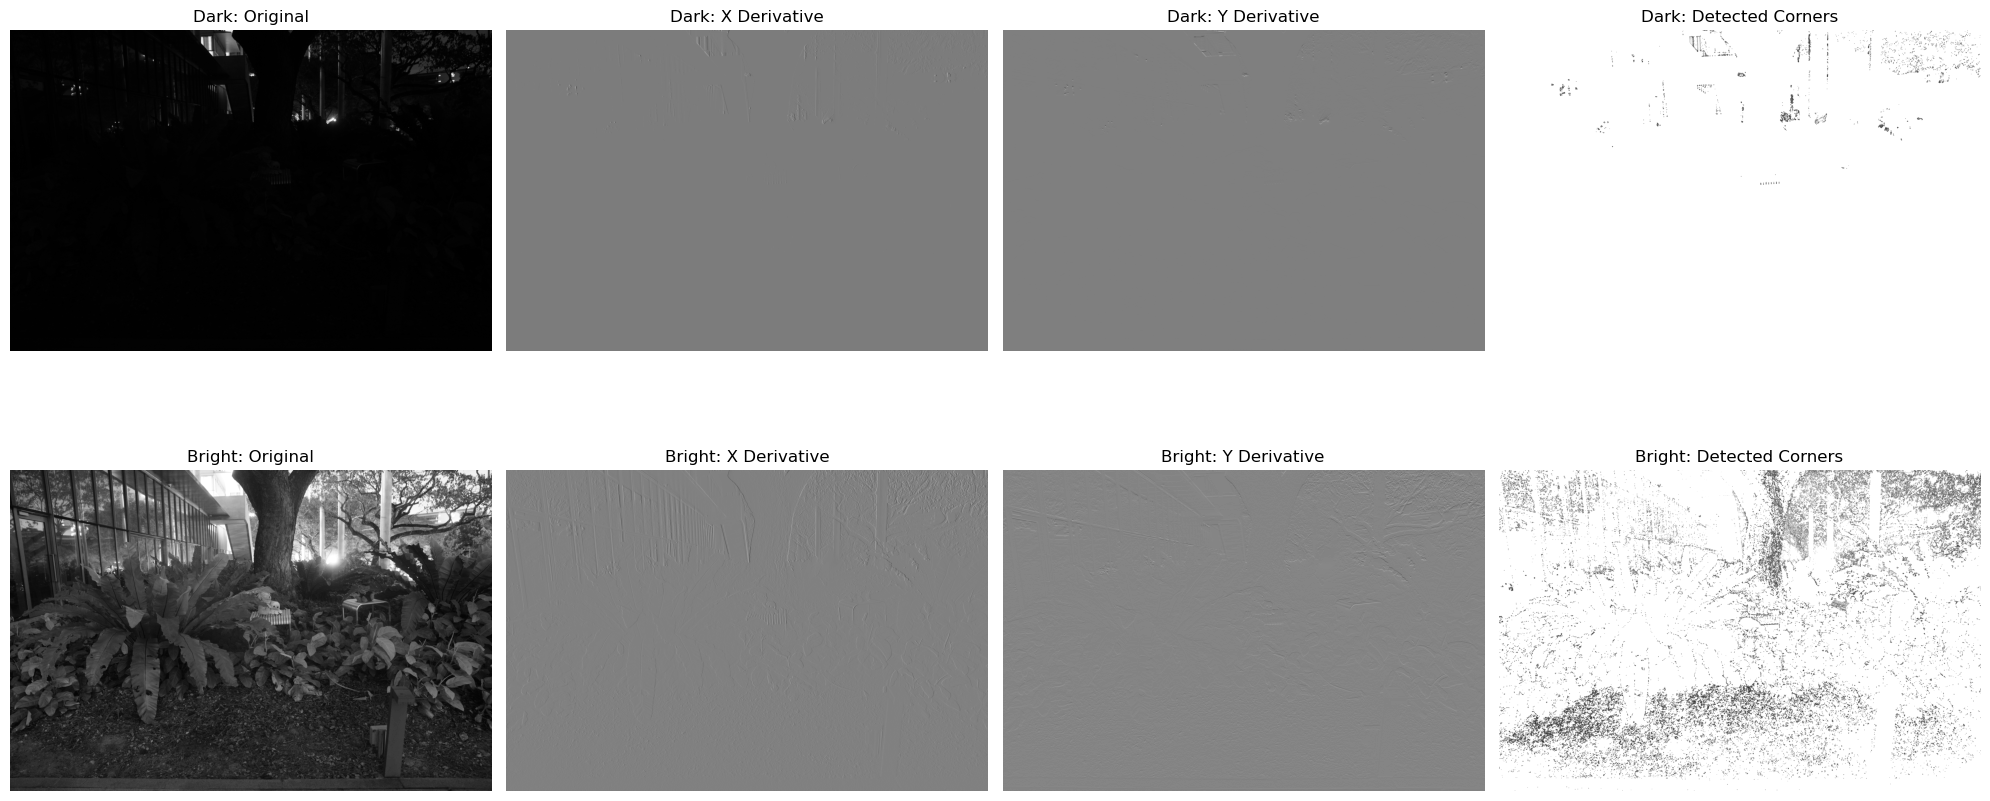

In [27]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 3 IS HERE                           ##
#############################################################################
def gradient_and_direction_harris(image):
    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)
    Ky = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]], dtype=np.float32)
    Ix = cv2.filter2D(image, cv2.CV_64F, Kx)
    Iy = cv2.filter2D(image, cv2.CV_64F, Ky)
    return Ix, Iy

def harris_corner_detector(image, k=0.04, window_size=3, threshold=0.0001):
    # Compute x and y derivatives using custom function
    dx, dy = gradient_and_direction_harris(image)

    # Compute products of derivatives
    dx2 = dx**2
    dy2 = dy**2
    dxy = dx*dy

    # Compute the sums of the products of derivatives at each pixel
    window = np.ones((window_size, window_size))
    sx2 = cv2.filter2D(dx2, -1, window)
    sy2 = cv2.filter2D(dy2, -1, window)
    sxy = cv2.filter2D(dxy, -1, window)

    # Define the matrix M
    det_M = sx2 * sy2 - sxy**2
    trace_M = sx2 + sy2

    # Compute the response function
    R = det_M - k * (trace_M**2)

    # Threshold and perform non-max suppression
    R[R < threshold * R.max()] = 0
    corners = cv2.dilate(R, None)
    img_corners = R == corners
    
    return dx, dy, R, img_corners

# Apply Harris corner detection to both images
dark_dx, dark_dy, dark_R, dark_corners = harris_corner_detector(dark_1_gray, threshold=0.0001)
bright_dx, bright_dy, bright_R, bright_corners = harris_corner_detector(bright_1_gray, threshold=0.0001)

# Plot results
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
titles = ['Original', 'X Derivative', 'Y Derivative', 'Detected Corners']

for i, (img, dx, dy, corners) in enumerate([(dark_1_gray, dark_dx, dark_dy, dark_corners), 
                                            (bright_1_gray, bright_dx, bright_dy, bright_corners)]):
    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].set_title(f'{"Dark" if i==0 else "Bright"}: {titles[0]}')
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(dx, cmap='gray')
    axes[i, 1].set_title(f'{"Dark" if i==0 else "Bright"}: {titles[1]}')
    axes[i, 1].axis('off')
    
    axes[i, 2].imshow(dy, cmap='gray')
    axes[i, 2].set_title(f'{"Dark" if i==0 else "Bright"}: {titles[2]}')
    axes[i, 2].axis('off')
    
    overlay = img.copy()
    overlay[corners] = 255
    axes[i, 3].imshow(overlay, cmap='gray')
    axes[i, 3].set_title(f'{"Dark" if i==0 else "Bright"}: {titles[3]}')
    axes[i, 3].axis('off')

plt.tight_layout()
plt.show()

[**Fill in your discussion to Step 3 here**]

Observation:
There are only a few corners detected in dark-1 after applying Harris Corner Dtetction, the corners detected are mainly at the upper corner of the image, and there are many corners that are not detected, the image only contains little details and information.
There are many corners detected in bright-1 and they are evenly distributted in the image, showing us the details and main features of the image. However, there seems to have some wrongly detected corners especially near the ground, this might because of the low threshold set.

Reasons for such results:
The low brightness and contrast of Dark-1 lead to unobvious gradient information, which affects the effect of corner detection. Since bright-1 has higher brightness and contrast, the corners are easier to detect. To detect enough corners to preserve the information of the image, the threshold is set to a low value of 0.0001, which can result in the noise spots in bright-1. But bright-1 still contain the key feature information of the image.    

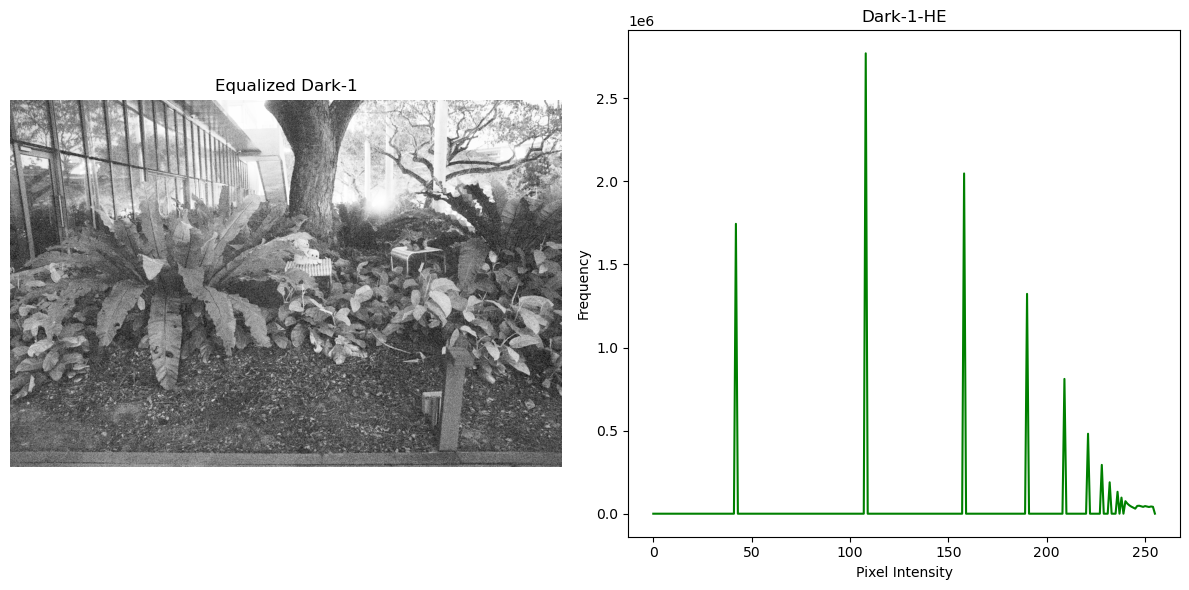

In [33]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 4 IS HERE                           ##
#############################################################################
def histogram_equalization(image):
    # Compute the histogram
    histogram = np.zeros(256, dtype=int)
    for pixel_value in image.flatten():
        histogram[pixel_value] += 1

    # Compute the cumulative distribution function (CDF)
    cdf = histogram.cumsum()
    cdf_normalized = cdf * (255 / cdf[-1])  # Normalize to [0, 255]

    # Use the CDF to map the old pixel values to the new ones
    equalized_image = np.interp(image.flatten(), range(256), cdf_normalized).reshape(image.shape).astype(np.uint8)

    return equalized_image

# Apply histogram equalization to Dark-1
dark_1_equalized = histogram_equalization(dark_1_gray)

# Plot the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(dark_1_equalized, cmap='gray')
plt.title('Equalized Dark-1')
plt.axis('off')


# Compute and plot histograms
dark_hist_equalized = compute_histogram(dark_1_equalized)

plt.subplot(122)
plt.plot(dark_hist_equalized, color='g')
plt.title('Dark-1-HE')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

[**Fill in your discussion to Step 4 here**]

In [ ]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 5 IS HERE                           ##
#############################################################################

[**Fill in your discussion to Step 5 here**]

In [ ]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 6 IS HERE                           ##
#############################################################################

[**Fill in your discussion to Step 6 here**]

#### Before Task 2
- For the following task, you are to use [GT1](https://canvas.nus.edu.sg/files/4601732/download?download_frd=1) (denote as Bright-1) and [GT2](https://canvas.nus.edu.sg/files/4601734/download?download_frd=1) (denote as Bright-2) as the stereo image pair.
- All raw images are given in RGB format (colored images), but you may also convert to grayscale images for your convenience. Show the step and result of grayscale conversion first if you are to convert to grayscale for your tasks.
- You may opt to resize the images in case you think the image is too large, the resize images **must not** be smaller than **800*800**. Show the step and result of resize first if you opt to resize the images.
- **IMPORTANT!** You may use any function of OpenCV or its equivalence for basic operations (e.g., loading images, matrix computation, etc.), but **strictly NOT** the direct functions for each individual task/step (e.g., cv.computeCorrespondEpilines for computing and drawing the epipolar lines and cv.findFundamentalMat for computing the fundamental matrix). Using such functions would consider the code to be erroneous.

#### Task 2: Computing the Fundamental Matrix and Finding the Epipolar Lines for Stereo Image Pairs (40%)
In this task, you will need to compute the fundamental matrix based on the (Normalized) 8-point algorithm. You are to choose the keypoints manually (you can use tools such as Paint for Windows), and then compute the fundamental matrix. You would then find, draw out, observe and discuss about the epipolar lines for your chosen keypoints. You are to follow the following steps (requirements):

##### Steps/Requirements for Task 2:
1. Find and highlight the keypoints in the image manually. For the 8-point algorithm, you should select at least 8 non-colinear points. State the individual positions in **homogeneous** coordinates, and highlight them in the corresponding image. If you choose to use the normalized 8-pt algorithm, you should state the coordinates of both the original keypoints and the normalized keypoints and showcase your code for normalization, but you only need to highlight the original keypoints. If you find highlighting in the pixel level is difficult, you may use a small circle centered at the selected keypoint for highlighting. (10%)
2. With the selected keypoints, compute the fundamental matrix *F* in detail. State the obtained fundamental matrix. (10%)
3. With the fundamental matrix, draw all the epipolar lines corresponding to the selected keypoints on both images. Observe and discuss how these lines indicate the positioning of the cameras. Also discuss if the computed lines match your intuitive idea of how the lines should be formed. If yes, why? If no, why not? (10%)
4. Lastly, with the computed fundamental matrix, we would be also able to find the epipolar line and subsequently the corresponding keypoint given a new keypoint. Select a **new** keypoint that does not lie on any of the drawn epipolar lines on Bright-1, then draw the epipolar line corresponding to this new keypoint on Bright-2. Observe and discuss if a possible keypoint can be obtained by searching across the drawn epipolar line. (10%)

In [ ]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 1 IS HERE                           ##
#############################################################################

[**Fill in your discussion to Step 1 here**]

In [ ]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 2 IS HERE                           ##
#############################################################################

[**Fill in your discussion to Step 2 here**]

In [ ]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 3 IS HERE                           ##
#############################################################################

[**Fill in your discussion to Step 3 here**]

In [ ]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 4 IS HERE                           ##
#############################################################################

[**Fill in your discussion to Step 4 here**]